## 0. Load Stuff

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [188]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

##Introduction
The purpose of this project is to analyze and visualize trends in voter registration in the United States in January–May of 2016 and 2020. The goal is to gain a better understanding of voter registration trends on both a national and state level. It is important for someone to read this notebook, particularly a citizen of the United States, to better understand their country and state's voter registration trends.

Research Questions:

* Question 1: In which month of which year was national total voter registration at its minimum?
* Question 2: In which months did voter registration in North Carolina fall below the national average?



## 1. Data Processing


In [189]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


The data contains four variable names, Jurisdiction, Year, Month, and New registered voters. The Jurisdiction variable contains the names of Washington D.C. and the 11 states included in the dataframe. The Year variable contains years from 2016 and 2020. The Month variable contains months from January to May. The New registered voters variable contains the number of new registered voters for each jurisdiction, month, and year.

In [190]:
voters.isnull().values.any()

False

The dataframe contains no null values.

In [191]:
voters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Jurisdiction           106 non-null    object
 1   Year                   106 non-null    int64 
 2   Month                  106 non-null    object
 3   New registered voters  106 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


The Jurisdiction and Month variables contain object data while the Year and New registered voters variables contain integer data.

In [192]:
voters = voters.rename(columns = {"Jurisdiction" : "NAME"})
voters = voters.rename(columns = {"New registered voters" : "registered_voters"})
voters.head(5)

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


The dataframe only contains voter registration data from 11 states (and Washington D.C), year data from 2016 and 2020, and month data from January to May. As such, any voters who registered in one of the other 39 states and/or in a year or month outside the specified range are not included in the dataframe.

###Exploratory Data Analysis

In [193]:
voters.loc[voters.registered_voters==voters.registered_voters.max()]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


The highest amount of new voter registration occurred in California in February 2020 with  238281 new registered voters.

In [194]:
voters["registered_voters"].mean()

48223.46226415094

The average voter registration is approximately 48223.

In [195]:
high_voters = voters.loc[voters.registered_voters > 48223]
high_voters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1 to 93
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NAME               36 non-null     object
 1   Year               36 non-null     int64 
 2   Month              36 non-null     object
 3   registered_voters  36 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


Voter registration was higher than average 36 times throughout the dataframe.

In [196]:
high_voters.loc[high_voters.NAME == "Arizona"]

,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853


In [197]:
high_voters.loc[high_voters.NAME == "California"]

,NAME,Year,Month,registered_voters
8,California,2016,Jan,87574
9,California,2016,Feb,103377
10,California,2016,Mar,174278
11,California,2016,Apr,185478
12,California,2020,Jan,151595
13,California,2020,Feb,238281
14,California,2020,Mar,176810


In [198]:
high_voters.loc[high_voters.NAME == "Colorado"]

,NAME,Year,Month,registered_voters


In [199]:
high_voters.loc[high_voters.NAME == "Delaware"]

,NAME,Year,Month,registered_voters


In [200]:
high_voters.loc[high_voters.NAME == "District of Columbia"]

,NAME,Year,Month,registered_voters


In [201]:
high_voters.loc[high_voters.NAME == "Florida"]

,NAME,Year,Month,registered_voters
42,Florida,2016,Jan,50231
43,Florida,2016,Feb,87351
44,Florida,2016,Mar,73627
45,Florida,2016,Apr,52508
46,Florida,2020,Jan,77466
47,Florida,2020,Feb,109859
48,Florida,2020,Mar,54872


In [202]:
high_voters.loc[high_voters.NAME == "Georgia"]

,NAME,Year,Month,registered_voters
55,Georgia,2020,Feb,55386


In [203]:
high_voters.loc[high_voters.NAME == "Illinois"]

,NAME,Year,Month,registered_voters
59,Illinois,2016,Feb,99674
60,Illinois,2016,Mar,52782
61,Illinois,2016,Apr,76098
63,Illinois,2020,Feb,68455


In [204]:
high_voters.loc[high_voters.NAME == "Maryland"]

,NAME,Year,Month,registered_voters


In [205]:
high_voters.loc[high_voters.NAME == "North Carolina"]

,NAME,Year,Month,registered_voters
77,North Carolina,2016,Feb,84357
78,North Carolina,2016,Mar,58272
79,North Carolina,2016,Apr,73341
81,North Carolina,2020,Jan,111990
82,North Carolina,2020,Feb,54053
83,North Carolina,2020,Mar,54807


In [206]:
high_voters.loc[high_voters.NAME == "Texas"]

,NAME,Year,Month,registered_voters
86,Texas,2016,Jan,132860
87,Texas,2016,Feb,143795
88,Texas,2016,Mar,170607
89,Texas,2016,Apr,143199
90,Texas,2016,May,91205
91,Texas,2020,Jan,134559
92,Texas,2020,Feb,130080
93,Texas,2020,Mar,129424


In [207]:
high_voters.loc[high_voters.NAME == "Virginia"]

,NAME,Year,Month,registered_voters


Arizona went above the national average 3 times, California 7 times, Colorado 0 times, Delaware 0 times, Washington D.C. 0 times, Florida 7 times, Georgia 1 time, Illinois 4 times, Maryland 0 times, North Carolina 6 times, Texas 8 times, and Virginia 0 times.

In [208]:
voters.groupby("NAME")["registered_voters"].mean().sort_values(ascending = False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


California, Texas, and Florida had the highest average voter registration.

##Data Visualization

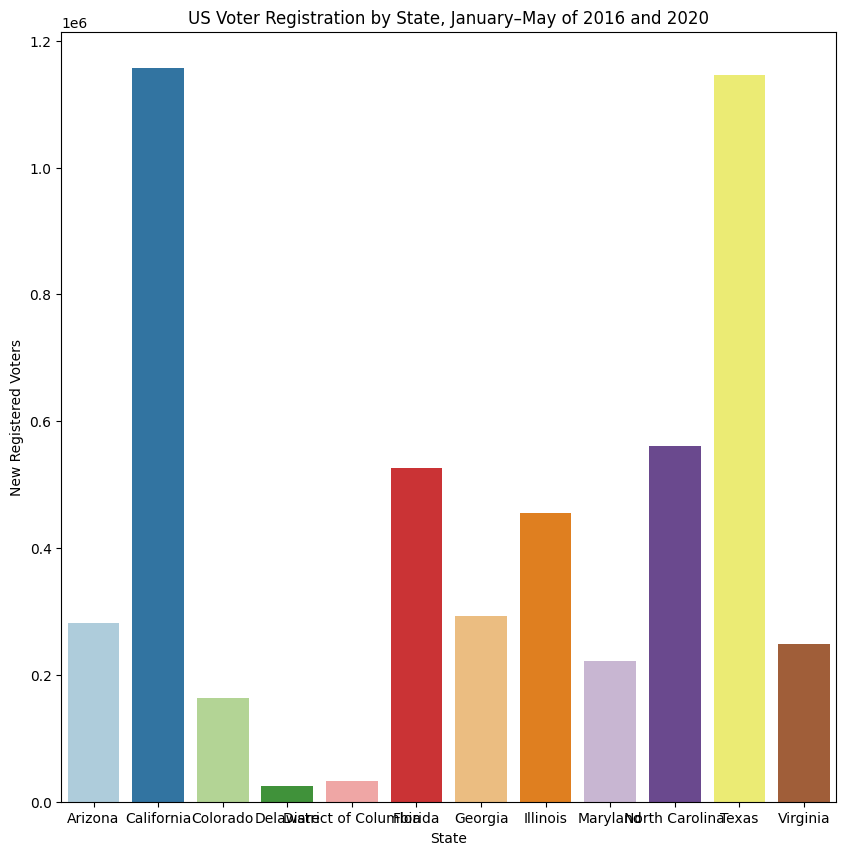

In [209]:
state_colors = ["#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", "#fb9a99", "#e31a1c", "#fdbf6f", "#ff7f00", "#cab2d6", "#6a3d9a", "#ffff60", "#b15928"]
voters_per_state = voters.groupby("NAME")["registered_voters"].sum().reset_index()
plt.figure(figsize = (10, 10))
sns.barplot(voters_per_state, x = "NAME", y = "registered_voters", palette = state_colors, hue = "NAME")
plt.xlabel("State")
plt.ylabel("New Registered Voters")
plt.title("US Voter Registration by State, January–May of 2016 and 2020")
plt.style.use("default")
plt.show()

California and Texas have the highest total voters registered while Delaware and District of Columbia have the lowest total voters registered.

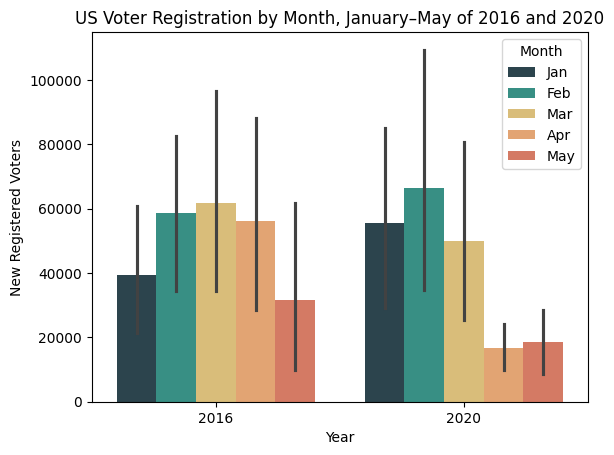

In [210]:
compare_colors = ["#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51"]
sns.barplot(voters, x = "Year", y = "registered_voters", palette = compare_colors, hue = "Month")
plt.xlabel("Year")
plt.ylabel("New Registered Voters")
plt.style.use("default")
plt.title("US Voter Registration by Month, January–May of 2016 and 2020")
plt.show()

Voter registration was highest in March 2016 and February 2020. Voter registration was lowest in May 2016 and April 2020. However, voter registration may be low across the board in May because, according to the GitHub page, the dataframe only contains voter registration for May in five jurisdictions, not all twelve.

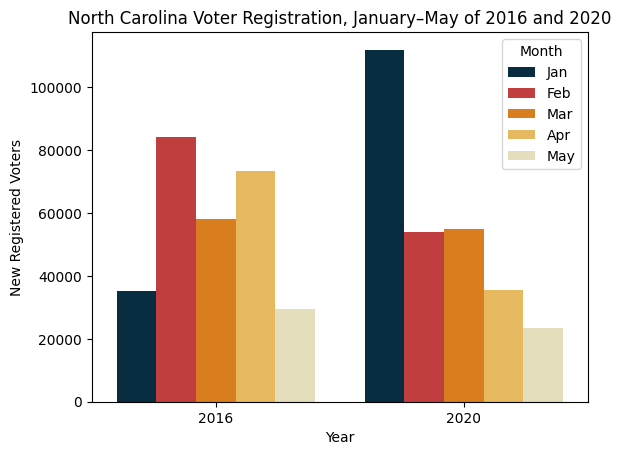

In [211]:
# In which months did voter registration in North Carolina fall below the national average?
north_carolina_colors = ["#003049", "#d62828", "#f77f00", "#fcbf49", "#eae2b7"]
north_carolina = voters.loc[voters.NAME == "North Carolina"]
sns.barplot(north_carolina, x = "Year", y = "registered_voters", palette = north_carolina_colors, hue = "Month")
plt.xlabel("Year")
plt.ylabel("New Registered Voters")
plt.title("North Carolina Voter Registration, January–May of 2016 and 2020")
plt.style.use("default")
plt.show()

The national average for voter regstration in the dataframe is approximately 48223. Voter registration in North Carolina fell below this number 4 times, January 2016, May 2016, April 2020, and May 2020.

##Mapping

In [212]:
!git clone https://github.com/SFord87/325-Datasets
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'
states = gpd.read_file(shapefile)

fatal: destination path '325-Datasets' already exists and is not an empty directory.


In [213]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]

In [214]:
avg_voters_per_state = voters.groupby("NAME")["registered_voters"].mean().reset_index()

In [215]:
state_voters = bbox.merge(avg_voters_per_state, on = "NAME", how = "inner")

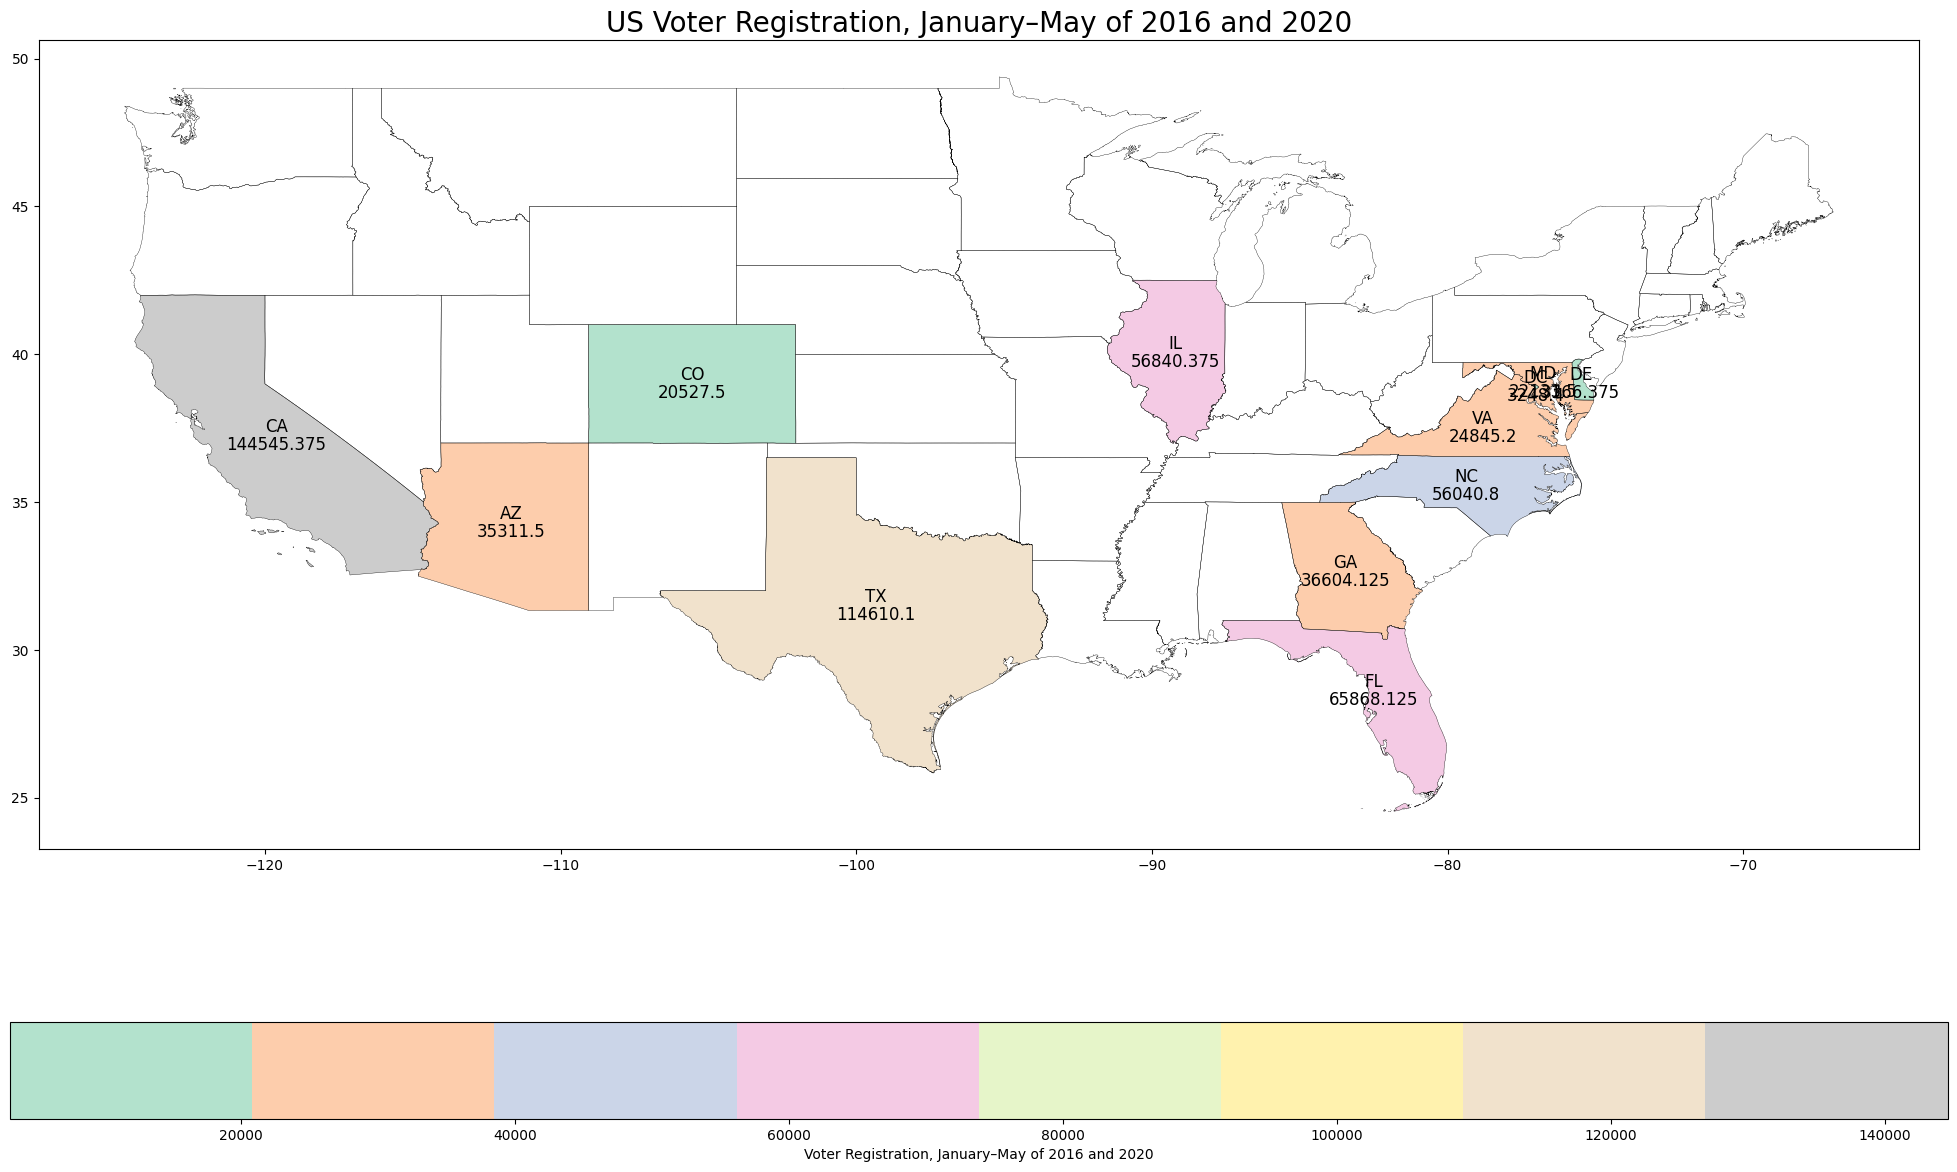

In [216]:
fig = plt.figure(1, figsize = (25,15))
ax = fig.add_subplot()
us_map = bbox.boundary.plot(ax = ax, figsize = (25, 15), color ="black", linewidth = 0.25)
state_voters.plot(column = "registered_voters", ax = us_map, cmap = "Pastel2", legend = True,
                  legend_kwds = {"label" : "Voter Registration, January–May of 2016 and 2020",
                  "orientation" : "horizontal"})
state_voters.apply(lambda x: ax.annotate(text = x.STUSPS,
                   xy = (x.geometry.centroid.x, x.geometry.centroid.y), ha = "center", va = "bottom", fontsize = 12), axis = 1)
state_voters.apply(lambda x: ax.annotate(text = x.registered_voters,
                   xy = (x.geometry.centroid.x, x.geometry.centroid.y), ha = "center", va = "top", fontsize = 12), axis = 1)
plt.title("US Voter Registration, January–May of 2016 and 2020", fontsize = 20)
plt.style.use("default")
plt.show()

##Conclusion

Through data analysis and visualization, I found that California had the highest total voter registration in 2016 and 2020 while Delaware had the lowest. The average voter registration was 48223, though this number was exceeded a total of 36 times; Texas exceeded this number a total of 8 times, more times than any other state in the dataframe. While North Carolina exceeded this number 6 times, it also fell below this number 4 times. In 2016, voter registration was highest in March and lowest in May. In 2020, voter registration was highest in February and lowest in April.

I would suggest that my client creates data visualizations of voter registration in each state, the same way I created a data visualization for North Carolina. This would give them a more detailed understanding of the data on a state level, as all other visualizations illustrated the data on a national level. I would also suggest that they investigate the data's minimum values, as this project mainly looks at the data's maximum and average values. This would help them to better understand patterns in decreasing voter registration.

One potential next step would be to look at voter registration data for the same states and years in the months of June–December, as the dataframe only includes data for the first 5 months of the year. Since another election year, 2024, has passed, it may be useful to view voter registration for that year as well. Additionally, it would be useful to look at voter registration data the jurisdictions not included in the dataframe, as it would provide a more accurate picture of voter registration in the United States as a whole. Overall, this project seems limited mainly by the restrictions placed on the dataframe used.

##Github


# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

###Charlie Bender